In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from utils import get_child_categories_count_by_parent_categories

In [14]:
data = pd.read_csv('../datasets/retail_products_classification/train.csv')
data = data[['categories', 'description']]
data['categories'] = data['categories'].str.split(',')
data['categories'] = data['categories'].apply(lambda x: [i.split('&') for i in x])
data['categories'] = data['categories'].apply(lambda x: [j for i in x for j in i])
data['categories'] = data['categories'].apply(lambda x: [c.strip() for c in x])
data = data.rename(columns={ 'categories': 'category' })
data

,category,description
0,"[Arts, Crafts, Sewing]",Solder Pick for picking up molten solder when ...
1,"[Cell Phones, Accessories]",We all screen. And we all need to protect thos...
2,"[Clothing, Shoes, Jewelry]","Bringing you precision at a glance, the Casio ..."
3,"[Tools, Home Improvement]",Factory-Reconditioned DEWALT DW260KR Heavy-Dut...
4,"[Health, Personal Care]",This twoway light features a bright flashlight...
...,...,...
46224,"[Sports, Outdoors]",Smooth - casting Berkley Trilene XL Fishing Li...
46225,"[Arts, Crafts, Sewing]","An easy to use, top quality spray gun for the ..."
46226,"[Arts, Crafts, Sewing]",Fimo Soft Polymer Clay is easier to use than b...
46227,"[Grocery, Gourmet Food]",Icing Colors. This plastic bottle contains 1 o...


In [15]:
data['description'].isna().sum()

1042

In [16]:
data = data.dropna()

data

,category,description
0,"[Arts, Crafts, Sewing]",Solder Pick for picking up molten solder when ...
1,"[Cell Phones, Accessories]",We all screen. And we all need to protect thos...
2,"[Clothing, Shoes, Jewelry]","Bringing you precision at a glance, the Casio ..."
3,"[Tools, Home Improvement]",Factory-Reconditioned DEWALT DW260KR Heavy-Dut...
4,"[Health, Personal Care]",This twoway light features a bright flashlight...
...,...,...
46224,"[Sports, Outdoors]",Smooth - casting Berkley Trilene XL Fishing Li...
46225,"[Arts, Crafts, Sewing]","An easy to use, top quality spray gun for the ..."
46226,"[Arts, Crafts, Sewing]",Fimo Soft Polymer Clay is easier to use than b...
46227,"[Grocery, Gourmet Food]",Icing Colors. This plastic bottle contains 1 o...


In [17]:
data['categories_count'] = data['category'].str.len()

data[data['categories_count'] == 1]

/tmp/ipykernel_26252/978913276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['categories_count'] = data['category'].str.len()


,category,description,categories_count
5,[Baby Products],This adorable ducky makes the perfect gift for...,1
6,[Baby Products],Lilypadz are the revolutionary alternative to ...,1
7,[Baby],Light weight double stroller that is perfect f...,1
9,[Baby],This toddler bed is for your little king or qu...,1
11,[Beauty],Give your hair total range with the Conair CS9...,1
...,...,...,...
46192,[All Beauty],This mascara gives your lashes fullness & leng...,1
46193,[All Beauty],Why choose to buy this product and why choose ...,1
46194,[Musical Instruments],The RD8 is our most value-oriented Classical g...,1
46195,[Musical Instruments],Controlled low-end rumble and a focused attack...,1


In [18]:
data = data[data['categories_count'] != 1]

data

,category,description,categories_count
0,"[Arts, Crafts, Sewing]",Solder Pick for picking up molten solder when ...,3
1,"[Cell Phones, Accessories]",We all screen. And we all need to protect thos...,2
2,"[Clothing, Shoes, Jewelry]","Bringing you precision at a glance, the Casio ...",3
3,"[Tools, Home Improvement]",Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,2
4,"[Health, Personal Care]",This twoway light features a bright flashlight...,2
...,...,...,...
46224,"[Sports, Outdoors]",Smooth - casting Berkley Trilene XL Fishing Li...,2
46225,"[Arts, Crafts, Sewing]","An easy to use, top quality spray gun for the ...",3
46226,"[Arts, Crafts, Sewing]",Fimo Soft Polymer Clay is easier to use than b...,3
46227,"[Grocery, Gourmet Food]",Icing Colors. This plastic bottle contains 1 o...,2


In [19]:
categories_count = Counter({})

for x in data['category']:
    categories_count += Counter(x)

categories_count

Counter({'Grocery': 2196,
         'Gourmet Food': 2196,
         'Toys': 2194,
         'Games': 2194,
         'Cell Phones': 2188,
         'Accessories': 2188,
         'Tools': 2183,
         'Home Improvement': 2183,
         'Clothing': 2182,
         'Shoes': 2182,
         'Jewelry': 2182,
         'Sports': 2178,
         'Outdoors': 2178,
         'Arts': 2175,
         'Crafts': 2175,
         'Sewing': 2175,
         'Patio': 2168,
         'Lawn': 2168,
         'Garden': 2168,
         'Health': 2154,
         'Personal Care': 2154,
         'Industrial': 2016,
         'Scientific': 2016})

In [20]:
all_unique_categories = list(set([k for x in data['category'] for k in x]))

len(all_unique_categories)

23

In [21]:
parent_unique_categories = list(set([x[0] for x in data['category']]))

parent_unique_categories

['Tools',
 'Health',
 'Patio',
 'Industrial',
 'Grocery',
 'Clothing',
 'Arts',
 'Cell Phones',
 'Toys',
 'Sports']

In [22]:
len(parent_unique_categories)

10

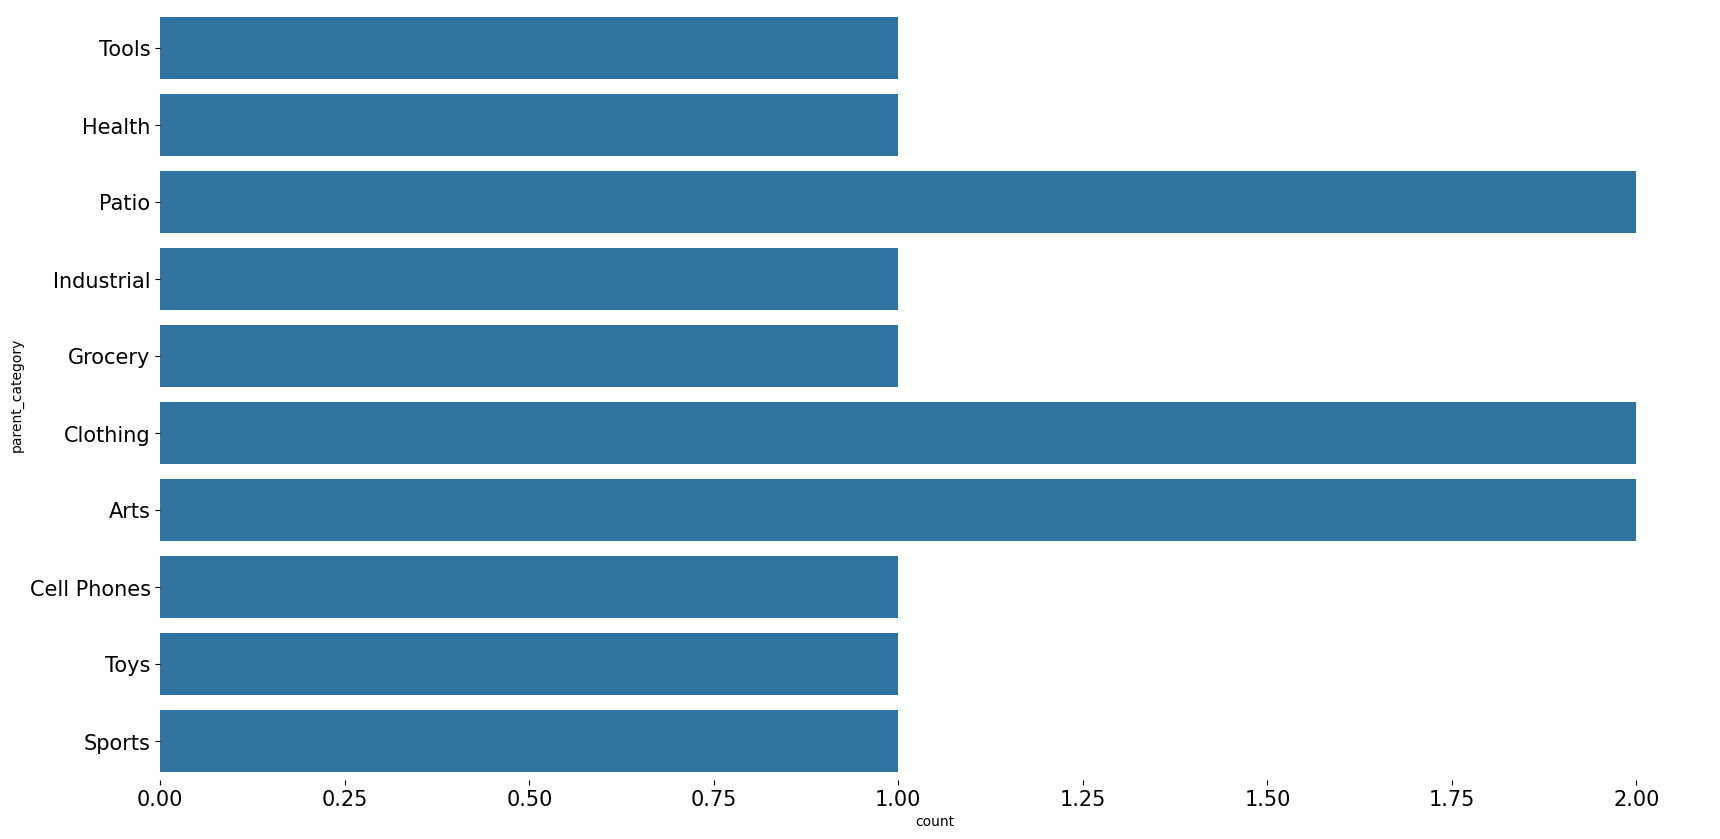

In [23]:
categories_counts = get_child_categories_count_by_parent_categories(data)
keys = categories_counts['parent_category']
# get values in the same order as keys, and parse percentage values
vals = categories_counts['count']

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [24]:
categories_counts

,parent_category,count
0,Tools,1
1,Health,1
2,Patio,2
3,Industrial,1
4,Grocery,1
5,Clothing,2
6,Arts,2
7,Cell Phones,1
8,Toys,1
9,Sports,1


/tmp/ipykernel_10240/708169020.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["description"].apply(count_words))


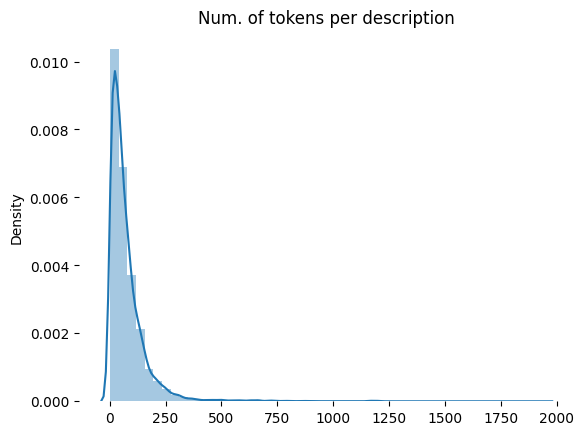

In [130]:
def count_words(x):
    return len(x.split())

ax = sns.distplot(data["description"].apply(count_words))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title("Num. of tokens per description")
plt.xlabel("")
plt.show()

In [131]:
data["description"].apply(count_words).describe()

count    21634.000000
mean        75.878340
std         93.996216
min          1.000000
25%         23.000000
50%         50.000000
75%         95.000000
max       1942.000000
Name: description, dtype: float64

In [135]:
data = data[(data['description'].str.split().str.len() > 10) & (data['description'].str.split().str.len() <= 300)]

In [137]:
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

,categories,description,categories_count
0,"[Cell Phones, Accessories]",We all screen. And we all need to protect thos...,2
1,"[Clothing, Shoes, Jewelry]","Bringing you precision at a glance, the Casio ...",3
2,"[Health, Personal Care]",This twoway light features a bright flashlight...,2
3,"[Patio, Lawn, Garden]",Eastman Outdoors offers High-Quality cooking p...,3
4,"[Clothing, Shoes, Jewelry]",Item Sizing: The size guide found below is spe...,3
...,...,...,...
18706,"[Sports, Outdoors]",Smooth - casting Berkley Trilene XL Fishing Li...,2
18707,"[Arts, Crafts, Sewing]","An easy to use, top quality spray gun for the ...",3
18708,"[Arts, Crafts, Sewing]",Fimo Soft Polymer Clay is easier to use than b...,3
18709,"[Grocery, Gourmet Food]",Icing Colors. This plastic bottle contains 1 o...,2


In [139]:
data['parent_category'] = data['category'].apply(lambda x: x[0])

data

,categories,description,categories_count,parent_category
0,"[Cell Phones, Accessories]",We all screen. And we all need to protect thos...,2,Cell Phones
1,"[Clothing, Shoes, Jewelry]","Bringing you precision at a glance, the Casio ...",3,Clothing
2,"[Health, Personal Care]",This twoway light features a bright flashlight...,2,Health
3,"[Patio, Lawn, Garden]",Eastman Outdoors offers High-Quality cooking p...,3,Patio
4,"[Clothing, Shoes, Jewelry]",Item Sizing: The size guide found below is spe...,3,Clothing
...,...,...,...,...
18706,"[Sports, Outdoors]",Smooth - casting Berkley Trilene XL Fishing Li...,2,Sports
18707,"[Arts, Crafts, Sewing]","An easy to use, top quality spray gun for the ...",3,Arts
18708,"[Arts, Crafts, Sewing]",Fimo Soft Polymer Clay is easier to use than b...,3,Arts
18709,"[Grocery, Gourmet Food]",Icing Colors. This plastic bottle contains 1 o...,2,Grocery


In [140]:
data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())

/tmp/ipykernel_10240/1204828366.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())


parent_category
Arts            63.418000
Cell Phones     77.818182
Clothing        57.684694
Grocery         64.067815
Health          80.366685
Industrial      62.713551
Patio           85.598481
Sports          62.981523
Tools           71.515152
Toys           106.303360
dtype: float64

/tmp/ipykernel_10240/3968563391.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  keys = list(data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean()).keys())
/tmp/ipykernel_10240/3968563391.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vals = [data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[k] for k in keys]
/t

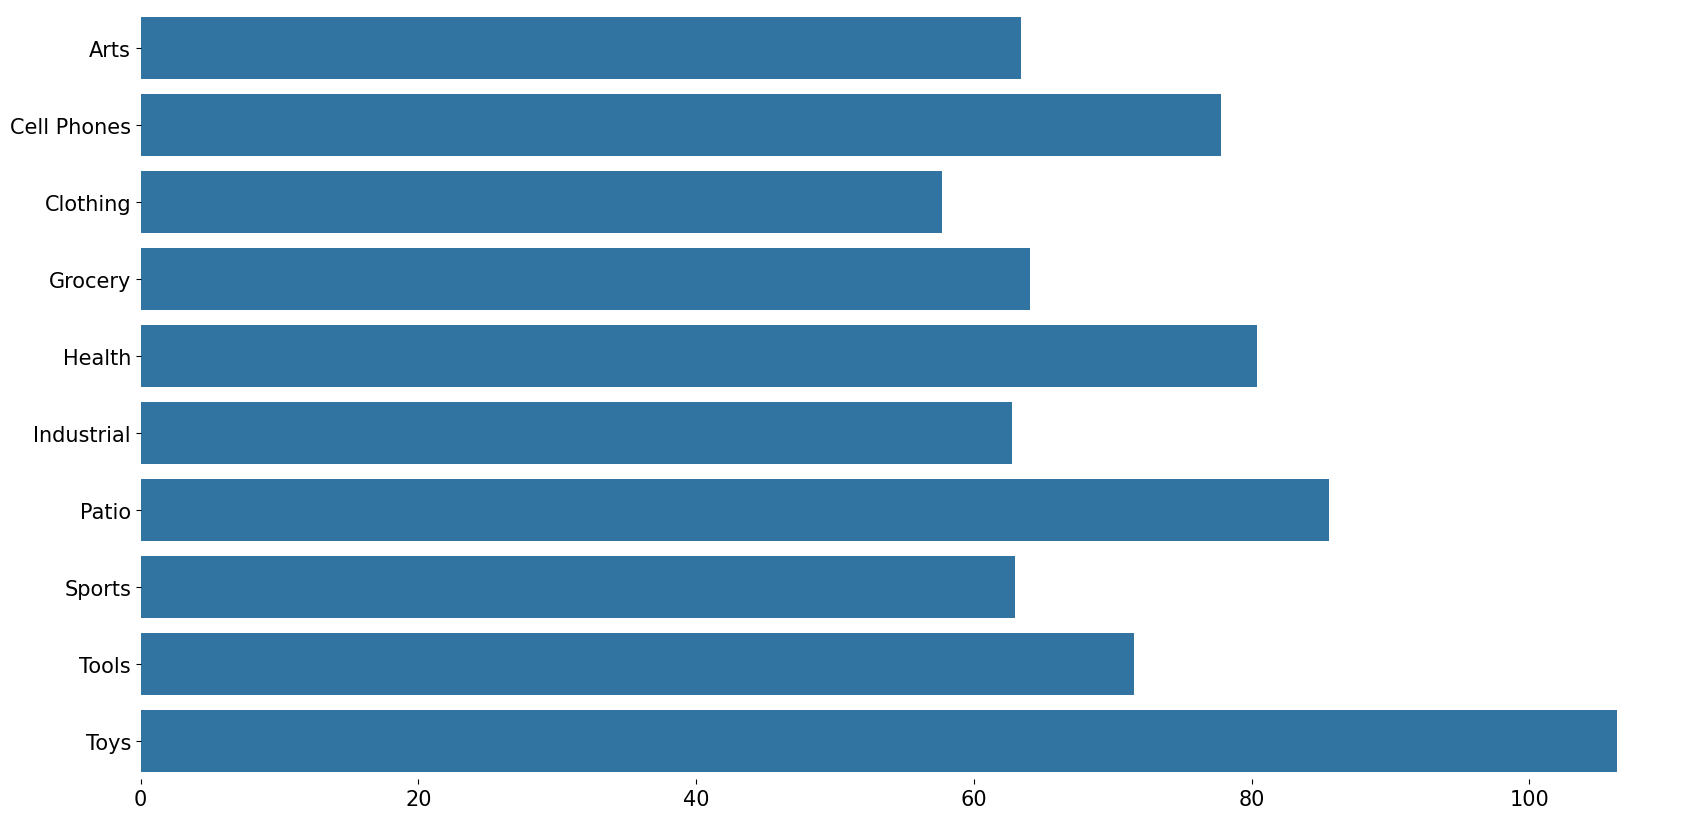

In [141]:
keys = list(data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean()).keys())
# get values in the same order as keys, and parse percentage values
vals = [data.groupby(['parent_category']).apply(lambda x: x['description'].str.split().str.len().mean())[k] for k in keys]

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [154]:
import statistics

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def confidence_interval(data, confidence=0.95):
  dist = statistics.NormalDist.from_samples(data)
  z = statistics.NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h

# confidence_interval(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
a = data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens]))
scipy.stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=scipy.stats.sem(a))

(5.31530044656111, 5.334203974557561)

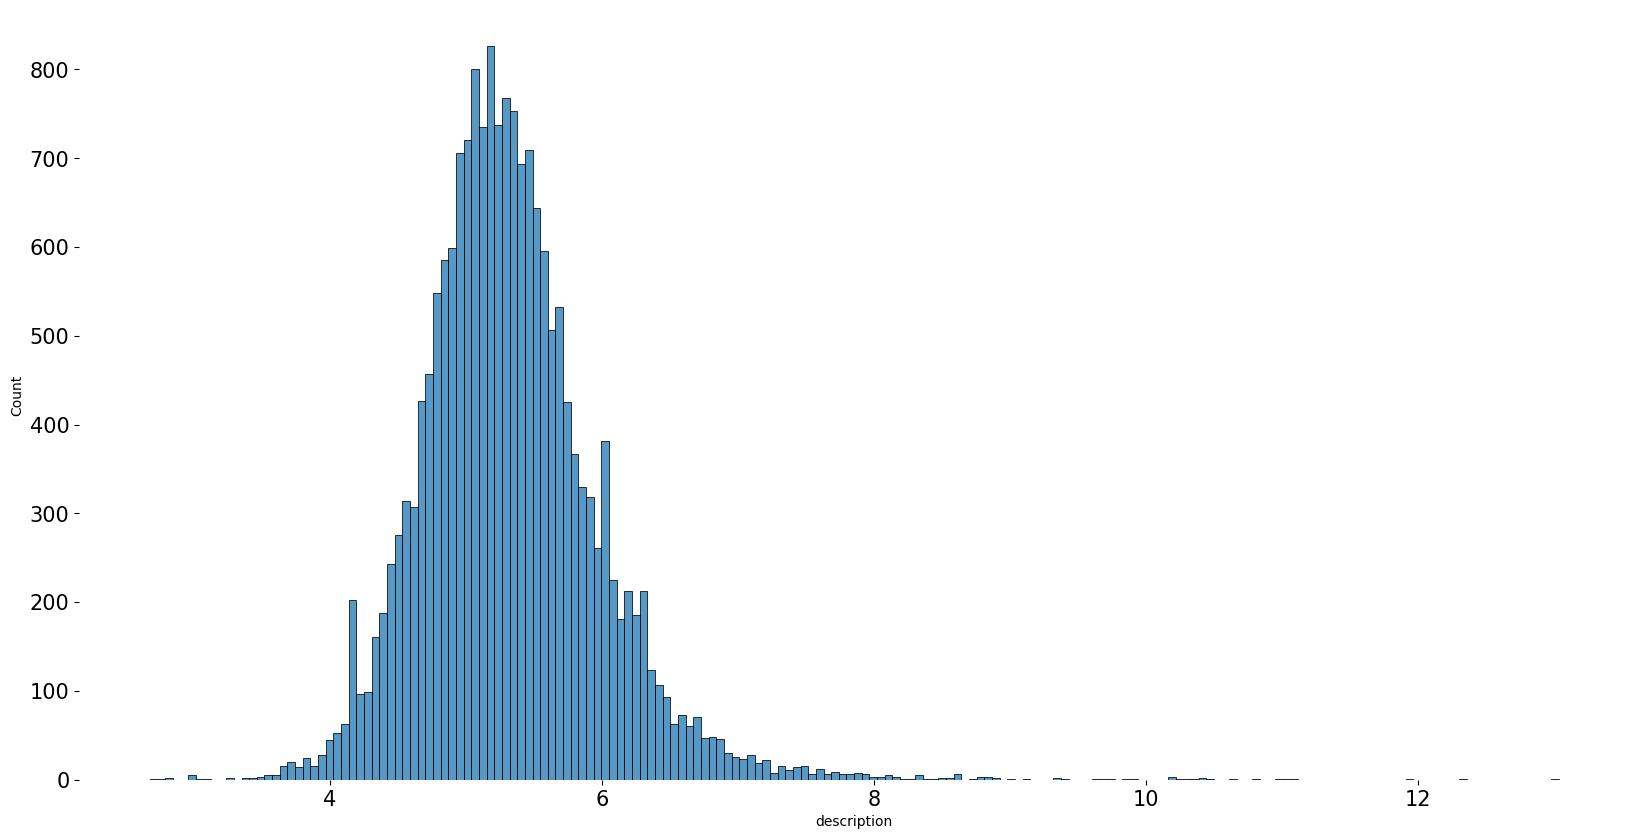

In [143]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])))
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [155]:
data['description'].str.split().apply(lambda tokens: np.mean([len(token) for token in tokens])).describe()

count    18711.000000
mean         5.324752
std          0.659607
min          2.676471
25%          4.915663
50%          5.266667
75%          5.666667
max         13.032258
Name: description, dtype: float64

In [158]:
chars_count_per_parent_category = data.groupby(['parent_category']) \
    .apply(lambda row: row['description'].str.split().values) \
    .apply(lambda x: np.mean([len(j) for i in x for j in i]))

chars_count_per_parent_category

/tmp/ipykernel_10240/272737543.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row['description'].str.split().values) \


parent_category
Arts           5.324892
Cell Phones    5.164519
Clothing       5.340515
Grocery        5.124417
Health         5.625049
Industrial     5.594141
Patio          5.233146
Sports         5.289007
Tools          5.378970
Toys           5.185482
dtype: float64

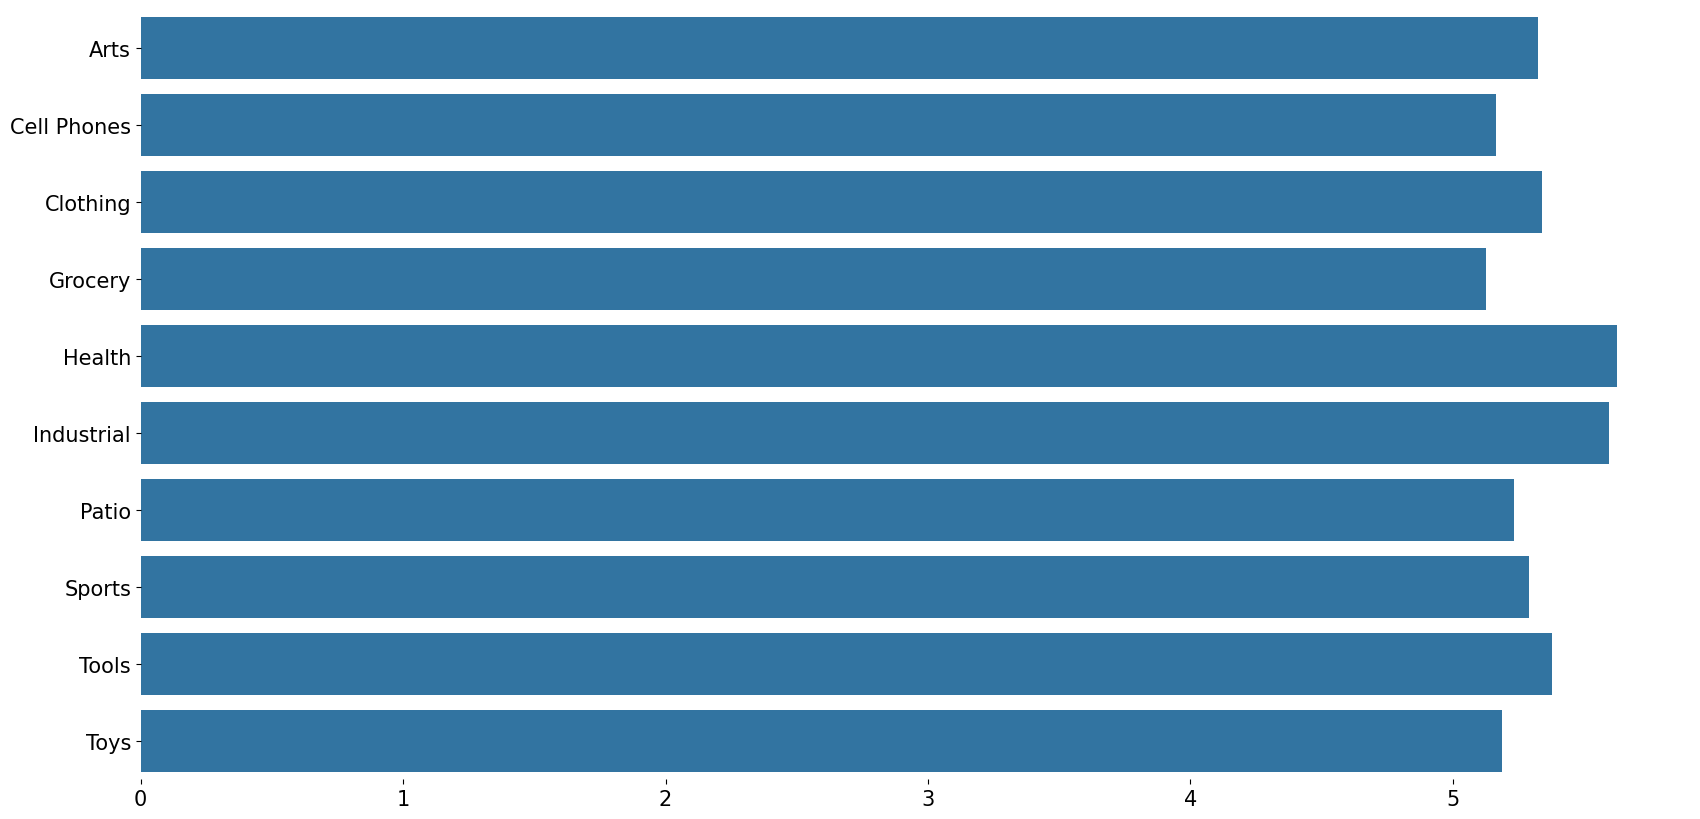

In [159]:
keys = list(chars_count_per_parent_category.keys())
# get values in the same order as keys, and parse percentage values
vals = list(chars_count_per_parent_category.values)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=vals, y=keys)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [160]:
words_counter = Counter()

for tokens in data['description'].str.split():
    words_counter += Counter(tokens)

words_counter_x, words_counter_y= [], []

for word,count in words_counter.most_common(15):
    words_counter_x.append(word)
    words_counter_y.append(count)

In [161]:
words_counter.most_common(15)

[('and', 50059),
 ('the', 45370),
 ('a', 29152),
 ('to', 28974),
 ('of', 25210),
 ('for', 20484),
 ('is', 17423),
 ('with', 16671),
 ('in', 15654),
 ('The', 12350),
 ('your', 10403),
 ('or', 8955),
 ('are', 7467),
 ('on', 7317),
 ('you', 6958)]

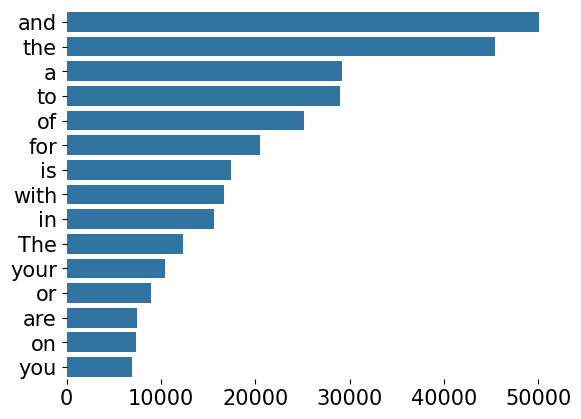

In [162]:
ax = sns.barplot(x=words_counter_y, y=words_counter_x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

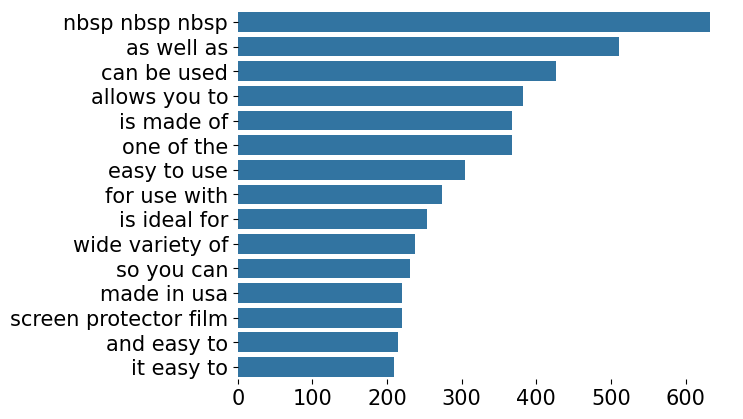

In [164]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

top_n_bigrams=get_top_ngram(data['description'], 3)[:15]
x,y=map(list,zip(*top_n_bigrams))
ax = sns.barplot(x=y,y=x)
ax.tick_params(labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()